In [44]:
import sys
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import urllib
from threading import Thread
from queue import Queue
import math
import requests
import time 
from datetime import timedelta
import pickle
from datetime import datetime

In [45]:
import matplotlib.pyplot as plt

In [46]:
import seaborn as sns
sns.set(color_codes=True)

In [ ]:
df = pd.DataFrame(columns=['author','date','activity', 'text', 'files'])
filne = "log_bootstrap.txt"
##with urllib2.urlopen("https://file.io/rSWakX") as f:
with open(filne, 'r+', encoding="utf-8") as f:
    lines = f.readlines()
    ##for i in range(0, 100):
  
    for i in range(0, len(lines)):
        line = lines[i]
        if line[:6] == "commit":
            sha = line[7:].strip()
            ##Author
            line = lines[i+1]
            if line[:6] == "Merge:":
                i = i + 1
                line = lines[i+1]
            divided = line.split("<")
            divided[1][:-2]          
            author = divided[1][:-2]
            ##Author
            line = lines[i+2]
            divided = line.split(":   ")
            date = divided[1].strip()
            line = lines[i+3]  
            text = ""
            if line in ['\n', '\r\n']:
                line = lines[i + 4]
                divided = line.split(":")
                activity = divided[0].strip()
            j = 5
            text += line
            while 1:
                line = lines[i+j]            
                if line in ['\n', '\r\n']:
                    break
                text += line    
                j = j + 1
            j = j + 1
            files = []
            while 1:
                line = lines[i+j]            
                if line in ['\n', '\r\n']:
                    break
                files.append(line)   
                j = j + 1
            print("...........")
            ##print sha
            ##print author
            ##print date
            ##print activity
            ##print files
            print(text)
            df.loc[sha] = pd.Series({'author': author, 'date': date, 'activity': activity, 'text': text, 'files': files})
        


...........
    Move htmllint to npm script.

...........
    Change to markdown (#21815)

...........
    Change header to use markdown (#21809)
    
    Header will now display in the Contents section.

...........
    Merge branch 'v4-dev' of https://github.com/twbs/bootstrap into v4-dev

...........
    Update grid layout docs (#21806)
    
    Update Mix and match section with correct responsive classes
    for stacking cols.

...........
    grunt

...........
    Drop Normalize, port relevant parts to Reboot (#21741)
    
    * Get this party started by removing mention of Normalize.css
    
    * Nuke the old comment, consolidate to a single line and number as appropriate
    
    * Bring over styles for HTML element from Normalize to Reboot
    
    * Move margin override for body element from Normalize to Reboot
    
    * Drop the block reset for HTML5 elements in IE9- from Normalize given we dropped IE9 support
    
    * Building on previous commit, do the same thing for f

In [48]:
df.head()

,author,date,activity,text,files
c5a9ebf57635cdf5096e76be961a05367edd3ddf,bardi@bardiharborow.com,Mon Jan 23 10:38:34 2017,Move htmllint to npm script.,Move htmllint to npm script.\n,[ Gruntfile.js | 25 ++++------------------...
563926717cbc1420218796396fac06c1005447bf,quy@fluxbb.org,Mon Jan 23 05:37:14 2017,Change to markdown (#21815),Change to markdown (#21815)\n,[ docs/layout/responsive-utilities.md | 3 ++-\...
091f3b8c246a8e4923f3f156ffbf3e359058d1d5,quy@fluxbb.org,Sun Jan 22 20:17:17 2017,Change header to use markdown (#21809),Change header to use markdown (#21809)\n ...,[ docs/layout/responsive-utilities.md | 3 ++-\...
c920049b5b36cfcb225c92d9aaf743fa6320a2e0,markdotto@gmail.com,Sun Jan 22 03:02:23 2017,Merge branch 'v4-dev' of https,Merge branch 'v4-dev' of https://github.co...,[commit 3cb252570a0fb2507c7169427569f50a0a1cb0...
3cb252570a0fb2507c7169427569f50a0a1cb031,marcusmolchany@gmail.com,Sun Jan 22 03:01:13 2017,Update grid layout docs (#21806),Update grid layout docs (#21806)\n \n ...,"[ docs/layout/grid.md | 2 +-\n, 1 file change..."


In [49]:
len(df)

15740

In [50]:
df['changes'] = pd.Series(df['files'].str[-1], index=df.index)

In [51]:
df['n_files'] = pd.Series(df['changes'].str.split().str[0] , index=df.index)
df['insertions'] = pd.Series(df['changes'].str.split(",").str[1].str.split().str[0] , index=df.index)
df['deletions'] = pd.Series(df['changes'].str.split(",").str[2].str.split().str[0] , index=df.index)


In [52]:
del df['changes']
df.head()

,author,date,activity,text,files,n_files,insertions,deletions
c5a9ebf57635cdf5096e76be961a05367edd3ddf,bardi@bardiharborow.com,Mon Jan 23 10:38:34 2017,Move htmllint to npm script.,Move htmllint to npm script.\n,[ Gruntfile.js | 25 ++++------------------...,3,24,22
563926717cbc1420218796396fac06c1005447bf,quy@fluxbb.org,Mon Jan 23 05:37:14 2017,Change to markdown (#21815),Change to markdown (#21815)\n,[ docs/layout/responsive-utilities.md | 3 ++-\...,1,2,1
091f3b8c246a8e4923f3f156ffbf3e359058d1d5,quy@fluxbb.org,Sun Jan 22 20:17:17 2017,Change header to use markdown (#21809),Change header to use markdown (#21809)\n ...,[ docs/layout/responsive-utilities.md | 3 ++-\...,1,2,1
c920049b5b36cfcb225c92d9aaf743fa6320a2e0,markdotto@gmail.com,Sun Jan 22 03:02:23 2017,Merge branch 'v4-dev' of https,Merge branch 'v4-dev' of https://github.co...,[commit 3cb252570a0fb2507c7169427569f50a0a1cb0...,Date:,NaN,NaN
3cb252570a0fb2507c7169427569f50a0a1cb031,marcusmolchany@gmail.com,Sun Jan 22 03:01:13 2017,Update grid layout docs (#21806),Update grid layout docs (#21806)\n \n ...,"[ docs/layout/grid.md | 2 +-\n, 1 file change...",1,1,1


In [53]:
df['n_files'] = df.n_files.apply(pd.to_numeric, args=('coerce',))
df['insertions'] = df.insertions.apply(pd.to_numeric, args=('coerce',))
df['deletions'] = df.deletions.apply(pd.to_numeric, args=('coerce',))


In [54]:
df.head()

,author,date,activity,text,files,n_files,insertions,deletions
c5a9ebf57635cdf5096e76be961a05367edd3ddf,bardi@bardiharborow.com,Mon Jan 23 10:38:34 2017,Move htmllint to npm script.,Move htmllint to npm script.\n,[ Gruntfile.js | 25 ++++------------------...,3.0,24.0,22.0
563926717cbc1420218796396fac06c1005447bf,quy@fluxbb.org,Mon Jan 23 05:37:14 2017,Change to markdown (#21815),Change to markdown (#21815)\n,[ docs/layout/responsive-utilities.md | 3 ++-\...,1.0,2.0,1.0
091f3b8c246a8e4923f3f156ffbf3e359058d1d5,quy@fluxbb.org,Sun Jan 22 20:17:17 2017,Change header to use markdown (#21809),Change header to use markdown (#21809)\n ...,[ docs/layout/responsive-utilities.md | 3 ++-\...,1.0,2.0,1.0
c920049b5b36cfcb225c92d9aaf743fa6320a2e0,markdotto@gmail.com,Sun Jan 22 03:02:23 2017,Merge branch 'v4-dev' of https,Merge branch 'v4-dev' of https://github.co...,[commit 3cb252570a0fb2507c7169427569f50a0a1cb0...,NaN,NaN,NaN
3cb252570a0fb2507c7169427569f50a0a1cb031,marcusmolchany@gmail.com,Sun Jan 22 03:01:13 2017,Update grid layout docs (#21806),Update grid layout docs (#21806)\n \n ...,"[ docs/layout/grid.md | 2 +-\n, 1 file change...",1.0,1.0,1.0


In [55]:
pattern_code = ".*\.awk(~?)|.*\.scm(~?)|.*\.glsl(~?)|.*\.patch(~?)|.*\.c((\.swp)?)(~?)|.*/script(s?)/.*|.*\.jar(~?)|.*/src/.*|.*\.m((\.swp)?)(~?)|.*\.cs(~?)|.*\.idl(~?)|.*\.s(~?)|.*\.r((\.swp)?)(~?)|.*\.cxx(~?)|.*\.pyc(~?)|.*\.asm(x?)(~?)|.*\.py((\.swp)?)(~?)|.*\.y((\.swp)?)(~?)|.*\.gi((\.swp)?)(∼?)|.*\.t((\.swp)?)(~?)|.*\.dll(~?)|.*\.h˙template((\.swp)?)(∼?)|.*\.js((\.swp)?)(~?)|.*\.rb((\.swp)?)(~?)|.*\.c˙template((\.swp)?)(∼ ?)|.*\.hg((\.swp)?)(~?)|.*\.pm((\.swp)?)(~?)|.*\.php((\.swp)?)(\d?)(∼ ?)|.*\.cc((\.swp)?)(~?)|.*\.sh((\.swp)?)(~?)|.*\.php((\.swp)?)(\d?)(∼ ?)|.*\.el((\.swp)?)(~?)|.*\.hh((\.swp)?)(~?)|.*\.h((pp)?)((\.swp)?)(∼ ?)|.*\.xs((\.swp)?)(~?)|.*\.pl((\.swp)?)(~?)|.*\.h\.tmpl((\.swp)?)(∼?)|.*\.mm((\.swp)?)(~?)|.*\.idl((\.swp)?)(~?)|.*\.h.win32((\.swp)?)(∼ ?)|.*\.xpt((\.swp)?)(~?)|.*\.ccg((\.swp)?)(~?)|.*\.c˙tmpl((\.swp)?)(∼?)|.*\.snk((\.swp)?)(~?)|.*\.inc((\.swp)?)(~?)|.*\.asp(x?)((\.swp)?)(∼ ?)|.*\.cpp((\.swp)?)(~?)|.*\.gob((\.swp)?)(~?)|.*\.vapi((\.swp)?)(∼?)|.*\.giv((\.swp)?)(~?)|.*\.dtd((\.swp)?)(~?)|.*\.gidl((\.swp)?)(∼?)|.*\.giv((\.swp)?)(~?)|.*\.ada((\.swp)?)(~?)|.*\.defs((\.swp)?)(∼?)|.*\.tcl((\.swp)?)(~?)|.*\.vbs((\.swp)?)(~?)|.*\.java((\.swp)?)(∼?)|.*\.nib((\.swp)?)(~?)|.*\.sed((\.swp)?)(~?)|.*\.vala((˙swp)?)(∼?)"
pattern_doc = "|.*\.zabw|.*/potfiles|.*/install|.*\.wml|.*\.chm|.*\.ods|.*/copyright|.*/version|.*\.css|.*\.vcard(~?)|.*/plan|.*/feature(s?)|.*\.txt((\.bak)?)|.*/credits|.*/notes|.*/licence|.*\.txt((\.old)?)|.*\.man|.*/howto|.*/license|.*\.rtf|.*\.ics|.*/faq|.*/maintainers|.*\.tex|.*/documenters|.*copying|.*/copying|.*\.sgml|.*\.gnumeric|.*/copying.*|.*/committers|.*\.eps|.*\.vcf|.*/doc(s?)/.*|.*/thanks|.*\.xsd|.*\.schemas|.*/help(s?)/.*|.*/authors|.*\.texi|.*\.doc|.*/bugs|.*\.docx"
pattern_test = ".*\.test(s?)/.*|.*/.*test\..*|.*/test.*\..*"
pattern_build = "|.*\.m4(~?)|.*makefile.*|.*\.prj|.*\.plo|.*\.mk|.*\.make|.*\.deps|.*\.wxiproj|.*\.am(~?)|.*\.mp4|.*\.builder|.*\.lo|.*\.target|.*\.iss|.*\.nsi|.*\.wxi|.*/configure((\..+)?)|.*\.wxs|.*/mkbundle\..+|.*\.in|.*/autogen\.((.+\.)?)sh|.*\.wpj|.*\.vc(x?)proj(i?)n((\.filters((in)?))?)|.*\.vcproj((\.filters((in)?))?)"

In [56]:
df['pat_code'] = 0
df['pat_doc'] = 0
df['pat_test'] = 0
df['pat_build'] = 0
df.head()

,author,date,activity,text,files,n_files,insertions,deletions,pat_code,pat_doc,pat_test,pat_build
c5a9ebf57635cdf5096e76be961a05367edd3ddf,bardi@bardiharborow.com,Mon Jan 23 10:38:34 2017,Move htmllint to npm script.,Move htmllint to npm script.\n,[ Gruntfile.js | 25 ++++------------------...,3.0,24.0,22.0,0,0,0,0
563926717cbc1420218796396fac06c1005447bf,quy@fluxbb.org,Mon Jan 23 05:37:14 2017,Change to markdown (#21815),Change to markdown (#21815)\n,[ docs/layout/responsive-utilities.md | 3 ++-\...,1.0,2.0,1.0,0,0,0,0
091f3b8c246a8e4923f3f156ffbf3e359058d1d5,quy@fluxbb.org,Sun Jan 22 20:17:17 2017,Change header to use markdown (#21809),Change header to use markdown (#21809)\n ...,[ docs/layout/responsive-utilities.md | 3 ++-\...,1.0,2.0,1.0,0,0,0,0
c920049b5b36cfcb225c92d9aaf743fa6320a2e0,markdotto@gmail.com,Sun Jan 22 03:02:23 2017,Merge branch 'v4-dev' of https,Merge branch 'v4-dev' of https://github.co...,[commit 3cb252570a0fb2507c7169427569f50a0a1cb0...,NaN,NaN,NaN,0,0,0,0
3cb252570a0fb2507c7169427569f50a0a1cb031,marcusmolchany@gmail.com,Sun Jan 22 03:01:13 2017,Update grid layout docs (#21806),Update grid layout docs (#21806)\n \n ...,"[ docs/layout/grid.md | 2 +-\n, 1 file change...",1.0,1.0,1.0,0,0,0,0


In [57]:
import re
for index, row in df.iterrows():
    code = 0
    doc = 0
    test = 0
    build = 0
    for j in range(0, len(row['files'])):
        match_code = re.match(pattern_code, row['files'][j], flags=0)
        if match_code:
            code += 1
        match_doc = re.match(pattern_doc, row['files'][j], flags=0)
        if match_doc:
            doc += 1
        match_test = re.match(pattern_test, row['files'][j], flags=0)
        if match_test:
            test += 1
        match_build = re.match(pattern_build, row['files'][j], flags=0)
        if match_build:
            build += 1
    
    df.set_value(index, 'pat_code', code) 
    df.set_value(index, 'pat_doc', doc) 
    df.set_value(index, 'pat_test', test) 
    df.set_value(index, 'pat_build', build) 
df.head()
    

,author,date,activity,text,files,n_files,insertions,deletions,pat_code,pat_doc,pat_test,pat_build
c5a9ebf57635cdf5096e76be961a05367edd3ddf,bardi@bardiharborow.com,Mon Jan 23 10:38:34 2017,Move htmllint to npm script.,Move htmllint to npm script.\n,[ Gruntfile.js | 25 ++++------------------...,3.0,24.0,22.0,2,4,0,4
563926717cbc1420218796396fac06c1005447bf,quy@fluxbb.org,Mon Jan 23 05:37:14 2017,Change to markdown (#21815),Change to markdown (#21815)\n,[ docs/layout/responsive-utilities.md | 3 ++-\...,1.0,2.0,1.0,1,2,0,2
091f3b8c246a8e4923f3f156ffbf3e359058d1d5,quy@fluxbb.org,Sun Jan 22 20:17:17 2017,Change header to use markdown (#21809),Change header to use markdown (#21809)\n ...,[ docs/layout/responsive-utilities.md | 3 ++-\...,1.0,2.0,1.0,1,2,0,2
c920049b5b36cfcb225c92d9aaf743fa6320a2e0,markdotto@gmail.com,Sun Jan 22 03:02:23 2017,Merge branch 'v4-dev' of https,Merge branch 'v4-dev' of https://github.co...,[commit 3cb252570a0fb2507c7169427569f50a0a1cb0...,NaN,NaN,NaN,1,3,0,3
3cb252570a0fb2507c7169427569f50a0a1cb031,marcusmolchany@gmail.com,Sun Jan 22 03:01:13 2017,Update grid layout docs (#21806),Update grid layout docs (#21806)\n \n ...,"[ docs/layout/grid.md | 2 +-\n, 1 file change...",1.0,1.0,1.0,1,2,0,2


In [58]:
df.insertions.describe()

D:\Anaconda\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


count    11751.000000
mean        85.486427
std        837.376180
min          0.000000
25%               NaN
50%               NaN
75%               NaN
max      46646.000000
Name: insertions, dtype: float64

In [59]:
comment_code = "(?:^|\W)cod(?:$|)"
comment_doc = "(?:^|\W)doc(?:$|)"
comment_test = "(?:^|\W)test(?:$|)"
comment_build = "(?:^|\W)build(?:$|)"


In [60]:
df['text_code'] = 0
df['text_doc'] = 0
df['text_test'] = 0
df['text_build'] = 0

In [61]:
match_code = re.findall(comment_code, df['text'][1], re.IGNORECASE)
match_doc = re.findall(comment_doc, df['text'][1], re.IGNORECASE)
match_test = re.findall(comment_test, df['text'][1], re.IGNORECASE)
match_build = re.findall(comment_build, df['text'][1], re.IGNORECASE)


In [62]:
for index, row in df.iterrows():   
    match_code = re.findall(comment_code, row['text'], re.IGNORECASE)
    match_doc = re.findall(comment_doc, row['text'], re.IGNORECASE)
    match_test = re.findall(comment_test, row['text'], re.IGNORECASE)
    match_build = re.findall(comment_build, row['text'], re.IGNORECASE)

    df.set_value(index, 'text_code', len(match_code)) 
    df.set_value(index, 'text_doc', len(match_doc)) 
    df.set_value(index, 'text_test', len(match_test))
    df.set_value(index, 'text_build', len(match_build)) 
df.head()

,author,date,activity,text,files,n_files,insertions,deletions,pat_code,pat_doc,pat_test,pat_build,text_code,text_doc,text_test,text_build
c5a9ebf57635cdf5096e76be961a05367edd3ddf,bardi@bardiharborow.com,Mon Jan 23 10:38:34 2017,Move htmllint to npm script.,Move htmllint to npm script.\n,[ Gruntfile.js | 25 ++++------------------...,3.0,24.0,22.0,2,4,0,4,0,0,0,0
563926717cbc1420218796396fac06c1005447bf,quy@fluxbb.org,Mon Jan 23 05:37:14 2017,Change to markdown (#21815),Change to markdown (#21815)\n,[ docs/layout/responsive-utilities.md | 3 ++-\...,1.0,2.0,1.0,1,2,0,2,0,0,0,0
091f3b8c246a8e4923f3f156ffbf3e359058d1d5,quy@fluxbb.org,Sun Jan 22 20:17:17 2017,Change header to use markdown (#21809),Change header to use markdown (#21809)\n ...,[ docs/layout/responsive-utilities.md | 3 ++-\...,1.0,2.0,1.0,1,2,0,2,0,0,0,0
c920049b5b36cfcb225c92d9aaf743fa6320a2e0,markdotto@gmail.com,Sun Jan 22 03:02:23 2017,Merge branch 'v4-dev' of https,Merge branch 'v4-dev' of https://github.co...,[commit 3cb252570a0fb2507c7169427569f50a0a1cb0...,NaN,NaN,NaN,1,3,0,3,0,0,0,0
3cb252570a0fb2507c7169427569f50a0a1cb031,marcusmolchany@gmail.com,Sun Jan 22 03:01:13 2017,Update grid layout docs (#21806),Update grid layout docs (#21806)\n \n ...,"[ docs/layout/grid.md | 2 +-\n, 1 file change...",1.0,1.0,1.0,1,2,0,2,0,1,0,0


In [63]:
from textblob import TextBlob

In [64]:
df['subjectivity'] = 0
df['polarity'] = 0

In [65]:
for index, row in df.iterrows(): 
    textblob = TextBlob(row['text'])
    df.set_value(index, 'polarity', textblob.sentiment.polarity) 
    df.set_value(index, 'subjectivity', textblob.sentiment.subjectivity) 
df.head()

,author,date,activity,text,files,n_files,insertions,deletions,pat_code,pat_doc,pat_test,pat_build,text_code,text_doc,text_test,text_build,subjectivity,polarity
c5a9ebf57635cdf5096e76be961a05367edd3ddf,bardi@bardiharborow.com,Mon Jan 23 10:38:34 2017,Move htmllint to npm script.,Move htmllint to npm script.\n,[ Gruntfile.js | 25 ++++------------------...,3.0,24.0,22.0,2,4,0,4,0,0,0,0,0,0
563926717cbc1420218796396fac06c1005447bf,quy@fluxbb.org,Mon Jan 23 05:37:14 2017,Change to markdown (#21815),Change to markdown (#21815)\n,[ docs/layout/responsive-utilities.md | 3 ++-\...,1.0,2.0,1.0,1,2,0,2,0,0,0,0,0,0
091f3b8c246a8e4923f3f156ffbf3e359058d1d5,quy@fluxbb.org,Sun Jan 22 20:17:17 2017,Change header to use markdown (#21809),Change header to use markdown (#21809)\n ...,[ docs/layout/responsive-utilities.md | 3 ++-\...,1.0,2.0,1.0,1,2,0,2,0,0,0,0,0,0
c920049b5b36cfcb225c92d9aaf743fa6320a2e0,markdotto@gmail.com,Sun Jan 22 03:02:23 2017,Merge branch 'v4-dev' of https,Merge branch 'v4-dev' of https://github.co...,[commit 3cb252570a0fb2507c7169427569f50a0a1cb0...,NaN,NaN,NaN,1,3,0,3,0,0,0,0,0,0
3cb252570a0fb2507c7169427569f50a0a1cb031,marcusmolchany@gmail.com,Sun Jan 22 03:01:13 2017,Update grid layout docs (#21806),Update grid layout docs (#21806)\n \n ...,"[ docs/layout/grid.md | 2 +-\n, 1 file change...",1.0,1.0,1.0,1,2,0,2,0,1,0,0,0,0


In [66]:
df.polarity.describe()

count    15740.000000
mean         0.000635
std          0.027605
min         -1.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: polarity, dtype: float64

In [67]:
print('Class                                                                                        Amount')
for i in range(1,10):
    classCount = df.activity.value_counts()
print(classCount)

Class                                                                                        Amount
grunt                                                                                    379
Merge branch '3.0.0-wip' of github.com                                                   181
Merge branch 'master' of github.com                                                      171
Merge branch '2.0-wip' of github.com                                                      63
Run `grunt`.                                                                              57
automatic grunt dist                                                                      55
grunt dist                                                                                46
Merge branch 'v4-dev' of https                                                            44
automatic `grunt dist`                                                                    42
Merge branch '2.0-wip' of https                                

In [68]:
print('User                                 Count')
for i in range(1,10):
    classCount = df.author.value_counts()
print(classCount)

User                                 Count
markdotto@gmail.com                    3139
otto@github.com                        3019
jacobthornton@gmail.com                1162
github@rebertia.com                    1005
markotto@twitter.com                   1000
code@rebertia.com                       962
markd.otto@gmail.com                    582
github@chrisrebert.com                  459
xhmikosr@gmail.com                      320
code@chrisrebert.com                    317
mark.otto@twitter.com                   307
hnrch02@gmail.com                       223
redux@splintered.co.uk                  218
xhmikosr@users.sourceforge.net          204
legospace9876@gmail.com                 161
bigj95t@gmail.com                       129
twbs-grunt@users.noreply.github.com      95
Kev.Kirsche+GitHub@gmail.com             62
quy@fluxbb.org                           59
XhmikosR@users.noreply.github.com        48
vsn4ik@gmail.com                         48
bardi@bardiharborow.com          

In [69]:
x = {'Count': pd.Series(df.activity.value_counts())
     }
activity_count = pd.DataFrame(x)
activity_count.head()






                    
                    


,Count
grunt,379
Merge branch '3.0.0-wip' of github.com,181
Merge branch 'master' of github.com,171
Merge branch '2.0-wip' of github.com,63
Run `grunt`.,57


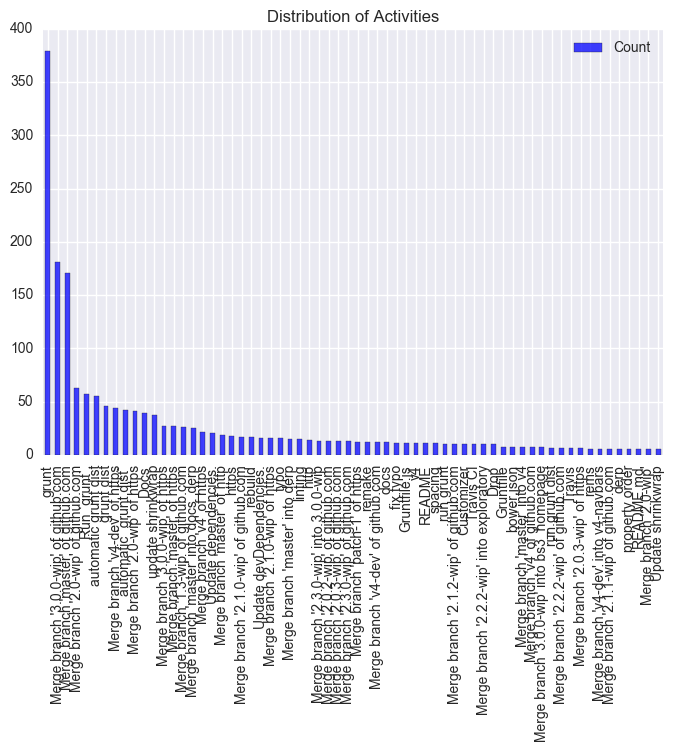

In [70]:
plt.figure(figsize=(18,10))
activity_count.query('Count > 5').plot(kind='bar', color="blue", alpha=.75)
plt.title("Distribution of Activities")
plt.show()

In [71]:
#####################

In [72]:
#####################

In [73]:
############################

In [74]:
##LEAVE THINGS ABOVE, BUT NOT RUN THEM

In [75]:
#######

In [76]:
#######

In [77]:
#######

In [78]:
#######

In [79]:
#######

In [80]:
from sklearn import cross_validation
from sklearn.preprocessing import *
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import *
from sklearn.cross_validation import KFold
import random

In [81]:
dfTest = pd.read_csv('jQuery_Training.csv', index_col=0, encoding="utf-8")
dfFinal = dfTest.drop("activity", 1).drop("files", 1).drop("text", 1).drop("date", 1).drop("author", 1)
X = dfFinal.values
y = dfTest.activity.values

In [82]:
dfTest.head()

,author,date,activity,text,files,n_files,insertions,deletions,pat_code,pat_doc,pat_test,pat_build,text_code,text_doc,text_test,text_build,subjectivity,polarity
8816caf26c0acc7067cd5bad9c03cfb54e54979,alex@louden.com,Thu Jan 5 16:49:02 2017 +0800,Docs,Docs: Correct typo in issue template\r\n,"[' .github/ISSUE_TEMPLATE.md | 2 +-\n', ' 1 fi...",1.0,1.0,1.0,1,2,0,2,0,1,0,0,0,0
10ac0e532a9376106c50f0c21a0d0fd0483b700,m.goleb@gmail.com,Fri Dec 30 12:17:00 2016 +0100,Build,Build: Drop support for building on Node.j...,"[' .travis.yml | 1 -\n', ' Gruntfile.js | 39...",2.0,11.0,29.0,2,3,0,3,0,0,1,2,0,0
d9145fa15d91ab6c804161ecd892d4d08b71aa2,broder93@gmail.com,Sat Dec 24 10:33:27 2016 +0000,Tests,Tests: Added tests for symbol-separated ta...,[' test/unit/core.js | 27 ++++++++++++++++++--...,1.0,18.0,9.0,1,2,0,2,0,0,2,0,0,0
cb4cd71ef018854f75646270bacd4c4d3da9cde,richard.gibson@gmail.com,Mon Dec 19 11:58:48 2016 -0500,Build,Build: Use valid ecmaVersion\r\n \r\n ...,[' test/node_smoke_tests/.eslintrc.json | 2 +-...,1.0,1.0,1.0,1,2,0,2,0,0,1,1,0,0
754e315f8a7760bcdc162712d2be7fee058fdc2,m.goleb@gmail.com,Wed Nov 30 15:32:29 2016 +0100,Build,Build: Add most of the dist folder to .esl...,"[' .eslintignore | 2 ++\n', ' 1 file changed, ...",1.0,2.0,0.0,0,2,0,2,0,0,0,1,0,0


In [83]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.25)
y_train

array(['Tests', 'Tests', 'Tests', 'Tests', 'Build', 'Build', 'Tests',
       'Build', 'Core', 'Core', 'Tests', 'Build', 'Core', 'Build', 'Core',
       'Core', 'Build', 'Build', 'Tests', 'Tests', 'Tests', 'Build',
       'Build', 'Core', 'Build', 'Build', 'Build', 'Core', 'Build',
       'Build', 'Tests', 'Tests', 'Build', 'Core', 'Release', 'Tests',
       'Build', 'Docs', 'Build', 'Build', 'Tests', 'Core', 'Tests',
       'Build', 'Build', 'Core', 'Docs', 'Tests', 'Build', 'Build', 'Core',
       'Tests', 'Build', 'Core', 'Docs', 'Docs', 'Build', 'Build', 'Build',
       'Core', 'Build', 'Build', 'Build', 'Build', 'Tests', 'Docs',
       'Release', 'Build', 'Docs', 'Build', 'Build', 'Build', 'Tests',
       'Build', 'Tests', 'Core', 'Core', 'Build', 'Core', 'Tests', 'Build',
       'Core', 'Build', 'Tests', 'Build', 'Build', 'Core', 'Build',
       'Tests', 'Core', 'Core', 'Release', 'Build', 'Tests', 'Build',
       'Core', 'Build', 'Core', 'Tests', 'Build', 'Build', 'Build',
      

In [84]:
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
"accuracy: %.1f percent"%(100*accuracy)

D:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


'accuracy: 82.1 percent'

In [85]:
df.describe()

D:\Anaconda\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,n_files,insertions,deletions,pat_code,pat_doc,pat_test,pat_build,text_code,text_doc,text_test,text_build,subjectivity,polarity
count,11751.000000,11751.000000,9821.000000,15740.000000,15740.000000,15740.000000,15740.000000,15740.000000,15740.000000,15740.000000,15740.000000,15740.000000,15740.000000
mean,3.253766,85.486427,78.098768,1.766010,4.003494,0.069695,4.003494,0.024333,0.241804,0.029924,0.008958,0.016836,0.000635
std,6.188165,837.376180,663.211140,3.780018,5.368620,0.697383,5.368620,0.169030,1.408354,0.205847,0.103235,0.128661,0.027605
min,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,NaN,NaN,NaN,1.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,1.000000,3.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,NaN,1.000000,4.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,236.000000,46646.000000,21852.000000,102.000000,237.000000,22.000000,237.000000,4.000000,69.000000,6.000000,4.000000,1.000000,1.000000


In [86]:
dfComplete = df.copy()
dfComplete['deletions'] = dfComplete['deletions'].fillna(0)
dfComplete['n_files'] = dfComplete['n_files'].fillna(0)
dfComplete['insertions'] = dfComplete['insertions'].fillna(0)
dfComplete.describe()

,n_files,insertions,deletions,pat_code,pat_doc,pat_test,pat_build,text_code,text_doc,text_test,text_build,subjectivity,polarity
count,15740.000000,15740.000000,15740.000000,15740.000000,15740.000000,15740.000000,15740.000000,15740.000000,15740.000000,15740.000000,15740.000000,15740.000000,15740.000000
mean,2.429161,63.821537,48.729860,1.766010,4.003494,0.069695,4.003494,0.024333,0.241804,0.029924,0.008958,0.016836,0.000635
std,5.530938,724.475670,525.228781,3.780018,5.368620,0.697383,5.368620,0.169030,1.408354,0.205847,0.103235,0.128661,0.027605
min,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,2.000000,1.000000,1.000000,3.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,13.000000,7.000000,1.000000,4.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,236.000000,46646.000000,21852.000000,102.000000,237.000000,22.000000,237.000000,4.000000,69.000000,6.000000,4.000000,1.000000,1.000000


In [87]:
dfCompleteX = dfComplete.drop("activity", 1).drop("files", 1).drop("text", 1).drop("date", 1).drop("author", 1)

In [88]:
dfCompleteX.head()

,n_files,insertions,deletions,pat_code,pat_doc,pat_test,pat_build,text_code,text_doc,text_test,text_build,subjectivity,polarity
c5a9ebf57635cdf5096e76be961a05367edd3ddf,3.0,24.0,22.0,2,4,0,4,0,0,0,0,0,0
563926717cbc1420218796396fac06c1005447bf,1.0,2.0,1.0,1,2,0,2,0,0,0,0,0,0
091f3b8c246a8e4923f3f156ffbf3e359058d1d5,1.0,2.0,1.0,1,2,0,2,0,0,0,0,0,0
c920049b5b36cfcb225c92d9aaf743fa6320a2e0,0.0,0.0,0.0,1,3,0,3,0,0,0,0,0,0
3cb252570a0fb2507c7169427569f50a0a1cb031,1.0,1.0,1.0,1,2,0,2,0,1,0,0,0,0


In [89]:
dfComplete["predicted"] = clf.predict(dfCompleteX)

In [90]:
dfComplete.describe()

,n_files,insertions,deletions,pat_code,pat_doc,pat_test,pat_build,text_code,text_doc,text_test,text_build,subjectivity,polarity
count,15740.000000,15740.000000,15740.000000,15740.000000,15740.000000,15740.000000,15740.000000,15740.000000,15740.000000,15740.000000,15740.000000,15740.000000,15740.000000
mean,2.429161,63.821537,48.729860,1.766010,4.003494,0.069695,4.003494,0.024333,0.241804,0.029924,0.008958,0.016836,0.000635
std,5.530938,724.475670,525.228781,3.780018,5.368620,0.697383,5.368620,0.169030,1.408354,0.205847,0.103235,0.128661,0.027605
min,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,2.000000,1.000000,1.000000,3.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,13.000000,7.000000,1.000000,4.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,236.000000,46646.000000,21852.000000,102.000000,237.000000,22.000000,237.000000,4.000000,69.000000,6.000000,4.000000,1.000000,1.000000


In [91]:
x = {'Count': pd.Series(dfComplete.predicted.value_counts())
     }
activity_count = pd.DataFrame(x)
activity_count.head()

,Count
Core,12362
Docs,2675
Tests,542
Build,125
Release,36


In [92]:
dfComplete[["activity", "predicted"]]

,activity,predicted
c5a9ebf57635cdf5096e76be961a05367edd3ddf,Move htmllint to npm script.,Core
563926717cbc1420218796396fac06c1005447bf,Change to markdown (#21815),Core
091f3b8c246a8e4923f3f156ffbf3e359058d1d5,Change header to use markdown (#21809),Core
c920049b5b36cfcb225c92d9aaf743fa6320a2e0,Merge branch 'v4-dev' of https,Core
3cb252570a0fb2507c7169427569f50a0a1cb031,Update grid layout docs (#21806),Docs
deb1c59c53f3a840bb1fe2794fdf9fc7d081f47f,grunt,Core
4fa7749442ea7ab609d1c8c25dc4ba750194e542,"Drop Normalize, port relevant parts to Reboot ...",Docs
0220d8b7d4232e0f40456fd3583d1aed02214b3b,grunt,Core
45fed9b0cd14ee76aa2397fb6a218e3aa4b4aa46,Merge branch 'v4-dev' of https,Core
9cf235508d8ae881304877e0c4da3258c69de867,Fix container within navbar on smallest breakp...,Core


In [93]:
dfTest2 = pd.read_csv('nodejs_Training.csv', index_col=0, encoding="utf-8")
dfFinal2 = dfTest2.drop("activity", 1).drop("files", 1).drop("text", 1).drop("date", 1).drop("author", 1)
X = dfFinal2.values
y = dfTest2.activity.values
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y)
clf2 = LinearDiscriminantAnalysis()
clf2.fit(X_train, y_train)
dfComplete["predicted2"] = clf2.predict(dfCompleteX)
dfComplete[["activity", "predicted", "predicted2"]]

D:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


,activity,predicted,predicted2
c5a9ebf57635cdf5096e76be961a05367edd3ddf,Move htmllint to npm script.,Core,src
563926717cbc1420218796396fac06c1005447bf,Change to markdown (#21815),Core,src
091f3b8c246a8e4923f3f156ffbf3e359058d1d5,Change header to use markdown (#21809),Core,src
c920049b5b36cfcb225c92d9aaf743fa6320a2e0,Merge branch 'v4-dev' of https,Core,src
3cb252570a0fb2507c7169427569f50a0a1cb031,Update grid layout docs (#21806),Docs,doc
deb1c59c53f3a840bb1fe2794fdf9fc7d081f47f,grunt,Core,src
4fa7749442ea7ab609d1c8c25dc4ba750194e542,"Drop Normalize, port relevant parts to Reboot ...",Docs,doc
0220d8b7d4232e0f40456fd3583d1aed02214b3b,grunt,Core,src
45fed9b0cd14ee76aa2397fb6a218e3aa4b4aa46,Merge branch 'v4-dev' of https,Core,src
9cf235508d8ae881304877e0c4da3258c69de867,Fix container within navbar on smallest breakp...,Core,src


In [94]:
dfComplete[["activity", "predicted", "predicted2"]].sample(100).to_csv('bootstrap100.csv', encoding="utf-8")

In [55]:
def accuracy_dist(name, x, y, dfComplete):
    print("----")
    print(name)
    correct = len(dfComplete[dfComplete.predicted.isin([x])][dfComplete.predicted2.isin([y])])
    wrong = len(dfComplete[dfComplete.predicted.isin([x])][~dfComplete.predicted2.isin([y])]) + len(dfComplete[~dfComplete.predicted.isin([x])][dfComplete.predicted2.isin([y])])
    print(correct/(correct + wrong))
    print("Same")
    print(correct)
    print("Different")
    print(wrong)
    print("----")
accuracy_dist("CORE",  "Core", "src", dfComplete)
accuracy_dist("BUILD", "Build", "build", dfComplete)
accuracy_dist("DOCS",  "Docs", "doc", dfComplete)
accuracy_dist("TEST", "Tests", "test",  dfComplete)

----
CORE
0.966108421303278
Same
12172
Different
427
----
----
BUILD
0.7948717948717948
Same
93
Different
24
----
----
DOCS
0.994392523364486
Same
2660
Different
15
----
----
TEST
0.6433962264150943
Same
341
Different
189
----


D:\Anaconda\lib\site-packages\ipykernel\__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
D:\Anaconda\lib\site-packages\ipykernel\__main__.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


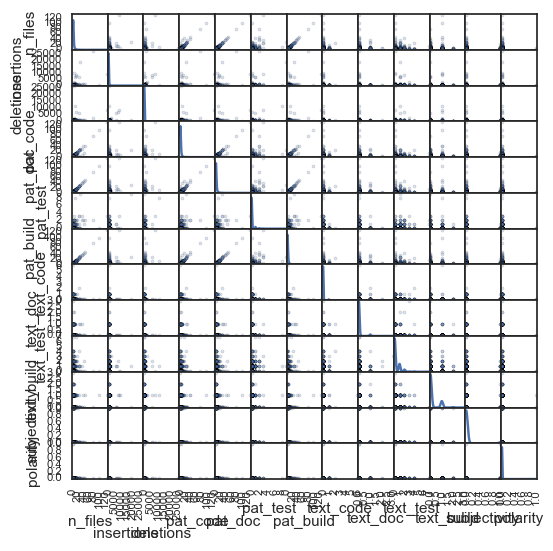

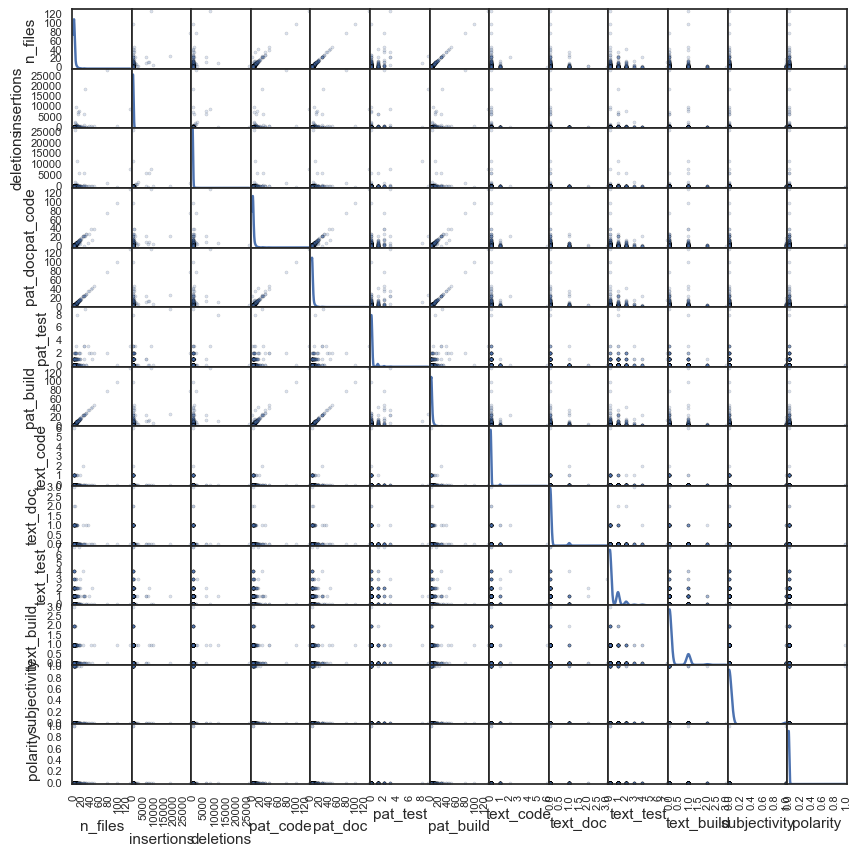

In [185]:
from pandas.tools.plotting import scatter_matrix

scatter_matrix(dfComplete, alpha=0.2, figsize=(10, 10), diagonal='kde')
plt.show()

In [130]:
clf = GaussianNB()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
"accuracy: %.1f percent"%(100*accuracy)

'accuracy: 61.1 percent'

In [131]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
"accuracy: %.1f percent"%(100*accuracy)

'accuracy: 54.7 percent'

In [132]:
scaler = StandardScaler().fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [140]:
clf = KNeighborsClassifier()
clf.fit(X_train_sc, y_train)
accuracy = clf.score(X_test_sc, y_test)
"accuracy: %.1f percent"%(100*accuracy)

'accuracy: 87.4 percent'

In [139]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
"accuracy: %.1f percent"%(100*accuracy)

'accuracy: 85.3 percent'

In [138]:
def accuracy_dist(clfs, X, y, n=10):
    accuracy = np.zeros((n,len(clfs)))
    columns = [clf.__class__.__name__ for clf in clfs]
    for i in range(n):
        X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, random_state=31*i)
        for j in range(len(clfs)):
            clf = clfs[j]
            clf.fit(X_train,y_train)
            accuracy[i][j] = clf.score(X_test,y_test)
    return pd.DataFrame(accuracy, columns=columns, index=range(n))

C:\Program Files\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


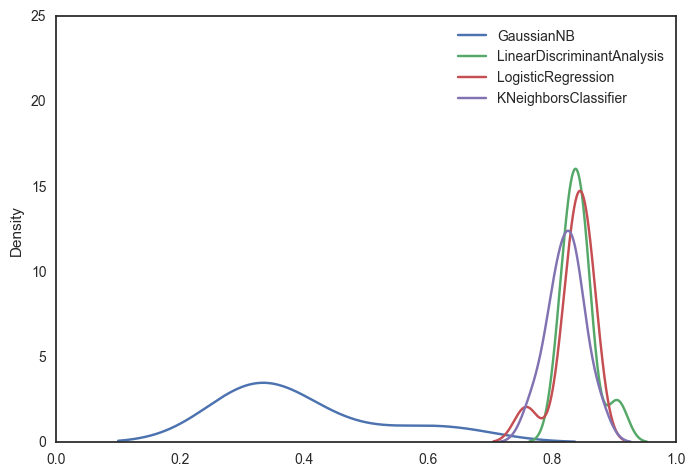

In [135]:
accuracy_df = accuracy_dist([GaussianNB(),LinearDiscriminantAnalysis(),LogisticRegression()], X, y)
accuracy_df = pd.concat(
    (accuracy_df, accuracy_dist([KNeighborsClassifier()], StandardScaler().fit_transform(X), y)), axis=1)
accuracy_df.plot(kind='kde', ylim=[0,25])
plt.show()

In [51]:
y = {'Count': pd.Series(df.author.value_counts())
     }
author_count = pd.DataFrame(y)
author_count.head()



,Count
timmywillisn@gmail.com,245
m.goleb@gmail.com,221
markelog@gmail.com,179
richard.gibson@gmail.com,145
dave.methvin@gmail.com,135


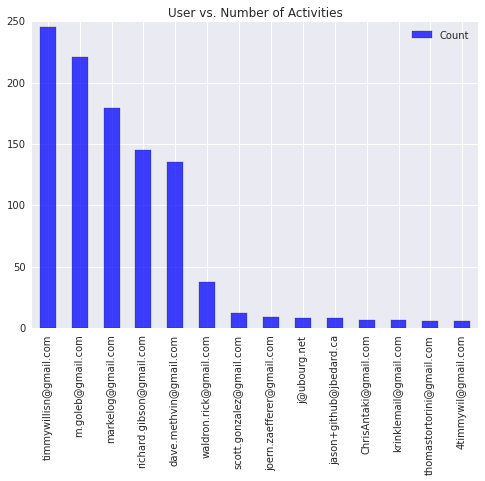

In [49]:
plt.figure(figsize=(18,10))
author_count.query('Count > 5').plot(kind='bar', color="blue", alpha=.75)
plt.title("User vs. Number of Activities")
plt.show()

In [ ]:
for index, row in df.iterrows(): 
    textblob = TextBlob(row['text'])
    df.set_value(index, 'polarity', textblob.sentiment.polarity) 
    df.set_value(index, 'subjectivity', textblob.sentiment.subjectivity) 
df.head()